# Notebook for testing and exploring the generalized workflow for feature extraction

In [2]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sklearn.decomposition import PCA
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sklearn.feature_selection import SelectKBest, chi2
from sktime.utils.data_processing import from_nested_to_2d_array
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.utils import shuffle

figure_path = module_path + '/figures/'

# Loading already extracted features

## KAGGLE

In [58]:
'''
X_, y_ = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/kaggle.ts')

X_ = from_nested_to_2d_array(X_)

X_.columns = np.arange(len(X_.columns))

y_ = pd.Series(y_)

kwargs = dict(test_size=0.2, random_state=1)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, **kwargs)


kwargs = dict(test_size=0.25, random_state=1)
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, **kwargs)
'''
X_train_, y_train_ = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/kaggle_TRAIN.ts')
X_test_, y_test_ = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/kaggle_TEST.ts')
X_val_, y_val_ = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/kaggle_VAL.ts')

X_train_, X_test_, X_val_ = from_nested_to_2d_array(X_train_), from_nested_to_2d_array(X_test_), from_nested_to_2d_array(X_val_)

cols = np.arange(len(X_test_.columns))
X_train_.columns, X_test_.columns, X_val_.columns = cols, cols, cols

y_train_, y_test_, y_val_ = pd.Series(y_train_), pd.Series(y_test_), pd.Series(y_val_)


scaler = MinMaxScaler() 
scaler.fit(X_train_)
X_train_ = pd.DataFrame(scaler.transform(X_train_)) 
X_val_ = pd.DataFrame(scaler.transform(X_val_)) 
X_test_ = pd.DataFrame(scaler.transform(X_test_))


indices_0 = np.where(y_val_ == 'normal')[0]
indices_1 = np.where(y_val_ == 'wheeze')[0]
indices_2 = np.where(y_val_ == 'crackle')[0]
#indices_val_ = np.concatenate((indices_0, indices_2))
indices_val_ = np.concatenate((indices_0, indices_1, indices_2))

indices_0 = np.where(y_train_ == 'normal')[0]
indices_1 = np.where(y_train_ == 'wheeze')[0]
indices_2 = np.where(y_train_ == 'crackle')[0]
#indices_train_ = np.concatenate((indices_0, indices_2))
indices_train_ = np.concatenate((indices_0, indices_1, indices_2))

indices_0 = np.where(y_test_ == 'normal')[0]
indices_1 = np.where(y_test_ == 'wheeze')[0]
indices_2 = np.where(y_test_ == 'crackle')[0]
#indices_test_ = np.concatenate((indices_0, indices_2))
indices_test_ = np.concatenate((indices_0, indices_1, indices_2))

## UIT

In [30]:
'''
X, y = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/UiTdataset_5s.ts')

X = from_nested_to_2d_array(X)

X.columns = np.arange(len(X.columns))

y = pd.Series(y)

kwargs = dict(test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, **kwargs)


kwargs = dict(test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, **kwargs)
'''
X_train, y_train_o = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/UiT_allLabels_scilence_2s_TRAIN.ts')
X_test, y_test_o = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/UiT_allLabels_scilence_2s_TEST.ts')
X_val, y_val_o = load_from_tsfile_to_dataframe(module_path + f'/features/extracted_ts_files/UiT_allLabels_scilence_2s_VAL.ts')
X_train, y_train_o = shuffle(X_train, y_train_o)


X_train, X_test, X_val = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test), from_nested_to_2d_array(X_val)

cols = np.arange(len(X_test.columns))
X_train.columns, X_test.columns, X_val.columns = cols, cols, cols

y_train_o, y_test_o, y_val_o = pd.Series(y_train_o), pd.Series(y_test_o), pd.Series(y_val_o)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train)) 
X_val = pd.DataFrame(scaler.transform(X_val)) 
X_test = pd.DataFrame(scaler.transform(X_test)) 

## 5 Class classification

In [ ]:
indices_1 = np.where(y_train_o == 'normal')[0]
indices_2 = np.where(y_train_o == 'exp_wheeze')[0]
indices_3 = np.where(y_train_o == 'insp_crackle')[0]
indices_4 = np.where(y_train_o == 'insp_wheeze')[0]
indices_5 = np.where(y_train_o == 'exp_crackle')[0]
indices_train = np.concatenate((indices_1[0:150], indices_2[:150], indices_3[:150], indices_4, indices_5))
#indices_train = np.concatenate((indices_2[:25], indices_3[:25], indices_4, indices_5))

indices_1 = np.where(y_test_o == 'normal')[0]
indices_2 = np.where(y_test_o == 'exp_wheeze')[0]
indices_3 = np.where(y_test_o == 'insp_crackle')[0]
indices_4 = np.where(y_test_o == 'insp_wheeze')[0]
indices_5 = np.where(y_test_o == 'exp_crackle')[0]
indices_test = np.concatenate((indices_1, indices_2, indices_3, indices_4, indices_5))
#indices_test = np.concatenate((indices_2, indices_3, indices_4, indices_5))

indices_1 = np.where(y_val_o == 'normal')[0]
indices_2 = np.where(y_val_o == 'exp_wheeze')[0]
indices_3 = np.where(y_val_o == 'insp_crackle')[0]
indices_4 = np.where(y_val_o == 'insp_wheeze')[0]
indices_5 = np.where(y_val_o == 'exp_crackle')[0]
indices_val = np.concatenate((indices_1, indices_2, indices_3, indices_4, indices_5))
#indices_val = np.concatenate((indices_2[0:11], indices_3[0:11], indices_4, indices_5))


le = preprocessing.LabelEncoder()

le.fit(y_train_[indices_train])
num_classes = len(le.classes_)
y_train = le.transform(y_train_[indices_train])
y_test = le.transform(y_test_[indices_test])
y_val = le.transform(y_val_[indices_val])

## Subclass classification

In [32]:
y_train_new.value_counts()

normal     1432
wheeze     1253
crackle    1170
dtype: int64

In [33]:
y_train_new = y_train_o.copy(deep = True)

y_train_new[y_train_new == 'exp_wheeze'] = 'wheeze'
y_train_new[y_train_new == 'insp_wheeze'] = 'wheeze'
y_train_new[y_train_new == 'exp_crackle'] = 'crackle'
y_train_new[y_train_new == 'insp_crackle'] = 'crackle'

y_test_new = y_test_o.copy(deep = True)

y_test_new[y_test_new == 'exp_wheeze'] = 'wheeze'
y_test_new[y_test_new == 'insp_wheeze'] = 'wheeze'
y_test_new[y_test_new == 'exp_crackle'] = 'crackle'
y_test_new[y_test_new == 'insp_crackle'] = 'crackle'

y_val_new = y_val_o.copy(deep = True)

y_val_new[y_val_new == 'exp_wheeze'] = 'wheeze'
y_val_new[y_val_new == 'insp_wheeze'] = 'wheeze'
y_val_new[y_val_new == 'exp_crackle'] = 'crackle'
y_val_new[y_val_new == 'insp_crackle'] = 'crackle'

indices_1 = np.where(y_train_new == 'normal')[0]
indices_2 = np.where(y_train_new == 'wheeze')[0]
indices_3 = np.where(y_train_new == 'crackle')[0]
#indices_train = np.concatenate((indices_2, indices_3))
indices_train = np.concatenate((indices_1[:1170], indices_2[:1170], indices_3))

indices_1 = np.where(y_test_new == 'normal')[0]
indices_2 = np.where(y_test_new == 'wheeze')[0]
indices_3 = np.where(y_test_new == 'crackle')[0]
#indices_test = np.concatenate((indices_2, indices_3))
indices_test = np.concatenate((indices_1, indices_2, indices_3))

indices_1 = np.where(y_val_new == 'normal')[0]
indices_2 = np.where(y_val_new == 'wheeze')[0]
indices_3 = np.where(y_val_new == 'crackle')[0]
#indices_val = np.concatenate((indices_2, indices_3))
indices_val = np.concatenate((indices_1, indices_2, indices_3))

y_train = y_train_new[indices_train]
y_test = y_test_new[indices_test]
y_val = y_val_new[indices_val]
#le = preprocessing.LabelEncoder()

#le.fit(y_train_new[indices_train])
#num_classes = len(le.classes_)
#y_train = le.transform(y_train_new[indices_train])
#y_test = le.transform(y_test_new[indices_test])
#y_val = le.transform(y_val_new[indices_val])

## Combining Kaggle and UiT

In [60]:
y_val_c = pd.concat([y_val, y_val_.iloc[indices_val_]])
X_val_c = pd.concat([X_val.iloc[indices_val], X_val_.iloc[indices_val_]])

y_test_c = pd.concat([y_test, y_test_.iloc[indices_test_]])
X_test_c = pd.concat([X_test.iloc[indices_test], X_test_.iloc[indices_test_]])

y_train_c = pd.concat([y_train, y_train_.iloc[indices_train_]])
X_train_c = pd.concat([X_train.iloc[indices_train], X_train_.iloc[indices_train_]])

scaler = MinMaxScaler() 
scaler.fit(X_train_c)
X_train_c = pd.DataFrame(scaler.transform(X_train_c)) 
X_test_c = pd.DataFrame(scaler.transform(X_test_c)) 
X_val_c = pd.DataFrame(scaler.transform(X_val_c)) 

### Plotting PCR

**PLSR plot of the tromsø data**

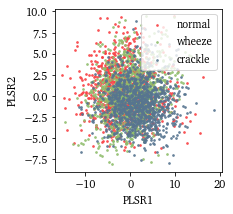

In [8]:
y_train_f = pd.factorize(y_train)

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train.iloc[indices_train], y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()

#f.savefig(figure_path + f'kaggle_vs_uit/PLSR_uit.pdf', bbox_inches='tight')

**PLSR plot of Kaggle dataset**

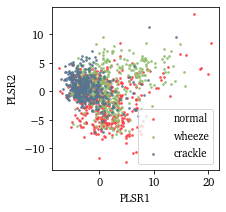

In [16]:
y_train_f = pd.factorize(y_train_.iloc[indices_train_])

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train_.iloc[indices_train_], y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()

f.savefig(figure_path + f'kaggle_vs_uit/PLSR_kaggle.pdf', bbox_inches='tight')

**PLSR plot when combining the two datasets**

Clearly the two datasets come from different distributions

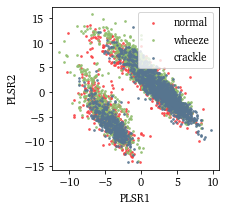

In [61]:
y_train_f = pd.factorize(y_train_c)

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train_c, y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()
f.savefig(figure_path + f'kaggle_vs_uit/PLSR_combined.pdf', bbox_inches='tight')

## Testing with K-NN classifier 

KNN classifier performed the best in the preproject


**Tromsø dataset**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5).fit(X_train.iloc[indices_train] , y_train.iloc[indices_train])

In [33]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

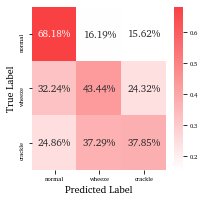

In [34]:
from sklearn.ensemble import RandomForestClassifier

class_names =  list(pd.factorize(y_train)[1])
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,random_state=42)
#clf = GaussianNB()
#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')


clf.fit(X_train.iloc[indices_train] , y_train)
y_pred = clf.predict(X_test.iloc[indices_test])

#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)

f, ax = utility.plot_cm(y_test , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_uit_scilence_split.pdf', bbox_inches='tight')

**Kaggle dataset**

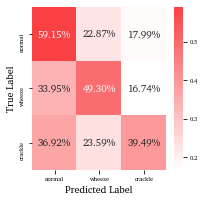

In [67]:
#clf = GaussianNB().fit(X_train, y_train)
class_names =  list(pd.factorize(y_train_.iloc[indices_train_])[1])

#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train_.iloc[indices_train_] , y_train_.iloc[indices_train_])
y_pred = clf.predict(X_val_.iloc[indices_val_])

f, ax = utility.plot_cm(y_val_.iloc[indices_val_] , y_pred, module_path = module_path, class_names = class_names)


f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_kaggle.pdf', bbox_inches='tight')

**Combination of the two datasets**

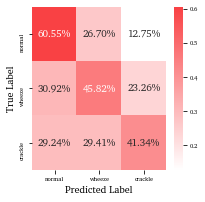

In [62]:
class_names =  list(pd.factorize(y_train_.iloc[indices_train_])[1])

#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train_c , y_train_c)
y_pred = clf.predict(X_val_c)

f, ax = utility.plot_cm(y_val_c , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_combined.pdf', bbox_inches='tight')

**Triple classification problem**

when using the tromsø dataset, with 5s slices

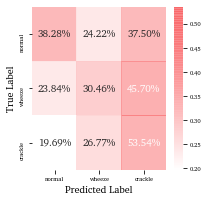

In [3]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance').fit(X_train , y_train)
 
y_pred = clf.predict(X_val)

f, ax = utility.plot_cm(y_val, y_pred, module_path = module_path, class_names = list(y_test.value_counts().index))


#f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_uit_multiclass_{win_len}s.pdf', bbox_inches='tight')

f.savefig(figure_path + f'kaggle_vs_uit/cm_knn_uit_multiclass_FULL.pdf', bbox_inches='tight')

# Train on UiT data, test on Kaggle Data

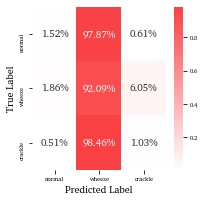

In [65]:
class_names =  list(pd.factorize(y_train)[1])


#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train.iloc[indices_train] , y_train )

y_pred = clf.predict(X_val_.iloc[indices_val_])

f, ax = utility.plot_cm(y_val_.iloc[indices_val_] , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_train_uit_test_kaggle.pdf', bbox_inches='tight')

## Train on UiT + Kaggle, and test on Kaggle data

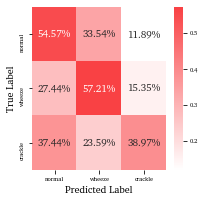

In [66]:
#clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

clf.fit(X_train_c, y_train_c )

y_pred = clf.predict(X_val_.iloc[indices_val_])

f, ax = utility.plot_cm(y_val_.iloc[indices_val_] , y_pred, module_path = module_path, class_names = class_names)

f.savefig(figure_path + f'kaggle_vs_uit/cm_combined_test_kaggle.pdf', bbox_inches='tight')